<a href="https://colab.research.google.com/github/OviRata/Advanced-Topics-in-Neural-Networks-Template-2024/blob/main/Lab06_Rata_Ovidiu_3A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most probable value (mode) for λ: 9.00
94% HDI for λ: [5.69, 13.78]


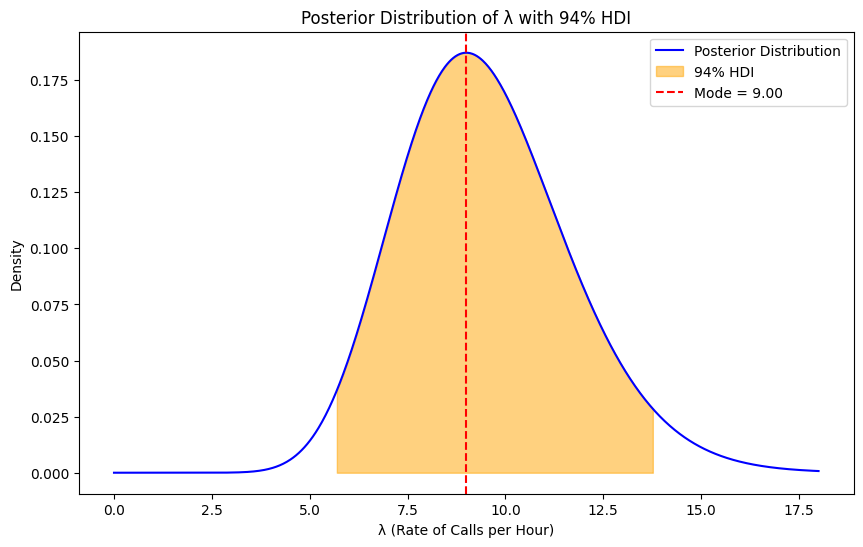

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import arviz as az

# Constants
TOTAL_CALLS = 180
OBSERVATION_TIME = 10
ALPHA_PRIOR = 1
BETA_PRIOR = 1

# Calculate observed rate
observed_rate = TOTAL_CALLS / OBSERVATION_TIME

# Update posterior parameters
alpha_post = ALPHA_PRIOR + 18
beta_post = BETA_PRIOR + 1

# Calculate the mode of the posterior distribution
def calculate_mode(alpha, beta):
    """Returns the mode of the gamma distribution if alpha > 1, otherwise 0."""
    return (alpha - 1) / beta if alpha > 1 else 0

mode_lambda = calculate_mode(alpha_post, beta_post)
print(f"Most probable value (mode) for λ: {mode_lambda:.2f}")

# Define posterior distribution using the updated alpha and beta
posterior_dist = gamma(a=alpha_post, scale=1/beta_post)

# Calculate the 94% HDI using ArviZ
def calculate_hdi(posterior_dist, samples=10000, hdi_prob=0.94):
    """Returns the High Density Interval (HDI) for the posterior distribution."""
    posterior_samples = posterior_dist.rvs(samples)
    return az.hdi(posterior_samples, hdi_prob=hdi_prob)

hdi_94 = calculate_hdi(posterior_dist)
print(f"94% HDI for λ: [{hdi_94[0]:.2f}, {hdi_94[1]:.2f}]")

# Plot posterior distribution with HDI shading
def plot_posterior_distribution(posterior_dist, mode_lambda, hdi_94):
    """Plots the posterior distribution along with the HDI shading and mode line."""
    lambda_values = np.linspace(0, 2 * mode_lambda, 1000)
    posterior_pdf = posterior_dist.pdf(lambda_values)

    plt.figure(figsize=(10, 6))
    plt.plot(lambda_values, posterior_pdf, label="Posterior Distribution", color="blue")
    plt.fill_between(lambda_values, 0, posterior_pdf, where=(lambda_values >= hdi_94[0]) & (lambda_values <= hdi_94[1]),
                     color="orange", alpha=0.5, label="94% HDI")
    plt.axvline(mode_lambda, color="red", linestyle="--", label=f"Mode = {mode_lambda:.2f}")
    plt.xlabel("λ (Rate of Calls per Hour)")
    plt.ylabel("Density")
    plt.title("Posterior Distribution of λ with 94% HDI")
    plt.legend()
    plt.show()

plot_posterior_distribution(posterior_dist, mode_lambda, hdi_94)